Homework 4: Sentiment Analysis - Task 0, Task 1, Task 5 (all primarily written tasks)
----

The following instructions are only written in this notebook but apply to all notebooks and `.py` files you submit for this homework.

**Due date: October 23rd, 2024 @ 9:00 PM**

Points: 
- Task 0: 5 points
- Task 1: 10 points
- Task 2: 30 points
- Task 3: 20 points
- Task 4: 20 points
- Task 5: 15 points

Goals:
- understand the difficulties of counting and probablities in NLP applications
- work with real world data to build a functioning language model
- stress test your model (to some extent)

Complete in groups of: __two (pairs)__. If you prefer to work on your own, you may, but be aware that this homework has been designed as a partner project.

Allowed python modules:
- `numpy`, `matplotlib`, `keras`, `pytorch`, `nltk`, `pandas`, `sci-kit learn` (`sklearn`), `seaborn`, and all built-in python libraries (e.g. `math` and `string`)
- if you would like to use a library not on this list, post on piazza to request permission
- all *necessary* imports have been included for you (all imports that we used in our solution)

Instructions:
- Complete outlined problems in this notebook. 
- When you have finished, __clear the kernel__ and __run__ your notebook "fresh" from top to bottom. Ensure that there are __no errors__. 
    - If a problem asks for you to write code that does result in an error (as in, the answer to the problem is an error), leave the code in your notebook but commented out so that running from top to bottom does not result in any errors.
- Double check that you have completed Task 0.
- Submit your work on Gradescope.
- Double check that your submission on Gradescope looks like you believe it should __and__ that all partners are included (for partner work).


Task 0: Name, References, Reflection (5 points)
---

Names
----
Names: __Adrian Criollo__ (Write these in every notebook you submit.)

References
---
List the resources you consulted to complete this homework here. Write one sentence per resource about what it provided to you. If you consulted no references to complete your assignment, write a brief sentence stating that this is the case and why it was the case for you.

(Example)
- https://docs.python.org/3/tutorial/datastructures.html
    - Read about the the basics and syntax for data structures in python.


Reflection
----
Answer the following questions __after__ you complete this assignment (no more than 1 sentence per question required, this section is graded on completion):

1. Does this work reflect your best effort? __Yes, this reflects my best effort.__
2. What was/were the most challenging part(s) of the assignment? __The most difficult for me was the NN part. I've worked with NB and LR but NN was new to me.__
3. If you want feedback, what function(s) or problem(s) would you like feedback on and why? __Everything in part 4.__
4. Briefly reflect on how your partnership functioned--who did which tasks, how was the workload on each of you individually as compared to the previous homeworks, etc. __I worked alone so I had all the workload.__

Task 1: Provided Data Write-Up (10 points)
---

Every time you use a data set in an NLP application (or in any software application), you should be able to answer a set of questions about that data. Answer these now. Default to no more than 1 sentence per question needed. If more explanation is necessary, do give it.

This is about the __provided__ movie review data set.

1. Where did you get the data from? The provided dataset(s) were sub-sampled from https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews 
2. (1 pt) How was the data collected (where did the people acquiring the data get it from and how)? __It looks like the data was scraped off of IMBD.__
3. (2 pts) How large is the dataset (answer for both the train and the dev set, separately)? (# reviews, # tokens in both the train and dev sets) __Training set is 428616 tokens and dev set is 55002 tokens.__
4. (1 pt) What is your data? (i.e. newswire, tweets, books, blogs, etc) __They are reviews on various movies.__
5. (1 pt) Who produced the data? (who were the authors of the text? Your answer might be a specific person or a particular group of people) __The producers were movie-goers.__
6. (2 pts) What is the distribution of labels in the data (answer for both the train and the dev set, separately)? __Train has 804 labeled 1 and 796 labeled 0. Dev has 105 labeled 1 and 95 labeled 0. This data is fairly distributed.__
7. (2 pts) How large is the vocabulary (answer for both the train and the dev set, separately)? __Train vocab size is 44008 and dev vocab size is 11000.__
8. (1 pt) How big is the overlap between the vocabulary for the train and dev set? __The overlap is 6973 words.__

In [5]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils
from nltk.tokenize import word_tokenize
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adriancriollo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Feel free to write code to help answer the above questions
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"
with open(TRAIN_FILE, 'r') as file:
    train_data = file.read()
print("Train tokens: ", len(word_tokenize(train_data)))
with open(DEV_FILE, 'r') as file:
    dev_data = file.read()
print("Dev tokens: ", len(word_tokenize(dev_data)))

df_train = pd.read_csv(TRAIN_FILE, header=None, sep='\t', names = ['ID', 'Review', 'Label'])
label_distribution = df_train['Label'].value_counts()
print("Train distribution: ", label_distribution)

df_dev = pd.read_csv(DEV_FILE, header=None, sep='\t', names = ['ID', 'Review', 'Label'])
label_distribution = df_dev['Label'].value_counts()
print("Dev distribution: ", label_distribution)

train_vocab = set()
for review in df_train['Review']:
    all_words = review.lower().split()
    train_vocab.update(all_words)
print("Train vocab size: ", len(train_vocab))
dev_vocab = set()
for review in df_dev['Review']:
    all_words = review.lower().split()
    dev_vocab.update(all_words)
print("Dev vocab size: ", len(dev_vocab))

print("Overlapping vocab size: ", len(train_vocab.intersection(dev_vocab)))

Train tokens:  428616
Dev tokens:  55002
Train distribution:  Label
1    804
0    796
Name: count, dtype: int64
Dev distribution:  Label
1    105
0     95
Name: count, dtype: int64
Train vocab size:  44008
Dev vocab size:  11000
Overlapping vocab size:  6973


Task 5: Model Evaluation (15 points)
---
Save your three graph files for the __best__ configurations that you found with your models using the `plt.savefig(filename)` command. The `bbox_inches` optional parameter will help you control how much whitespace outside of the graph is in your resulting image.

<span style="color: red;">__NOTE ABOUT THE GRAPHS:__ </span>

Run each notebook containing the **best classifier** three times, saving the output graphs separately each time. This should result in a total of **NINE** distinct graphs (three per notebook, e.g. for the three Naive Bayes model graphs you would have Naive_Bayes_run1.png, Naive_Bayes_run2.png, Naive_Bayes_run3.png, etc.). Ensure you do not overwrite previous graphs when you save the graphs as images.

* The goal of running the notebook three times is to check if your model's performance is consistent, confirming that your results are reliable and not due to randomness.

* If all your graphs look identical, remove the random seed parameter and re-run the notebook. The absence of a seed should introduce variation between runs.

* Should the graphs remain identical even after removing the seed, you may proceed with submitting the three identical graphs for the model.

* Repeat this process for each of the three notebooks.

You will turn in all of these files.

**10 points in this section are allocated for all 9 graphs being:**
- Legible
- Present below
- Properly labeled
     - x and y axes labeled
     - Legend for accuracy measures plotted
     - Plot Title with which model and run number the graph represents


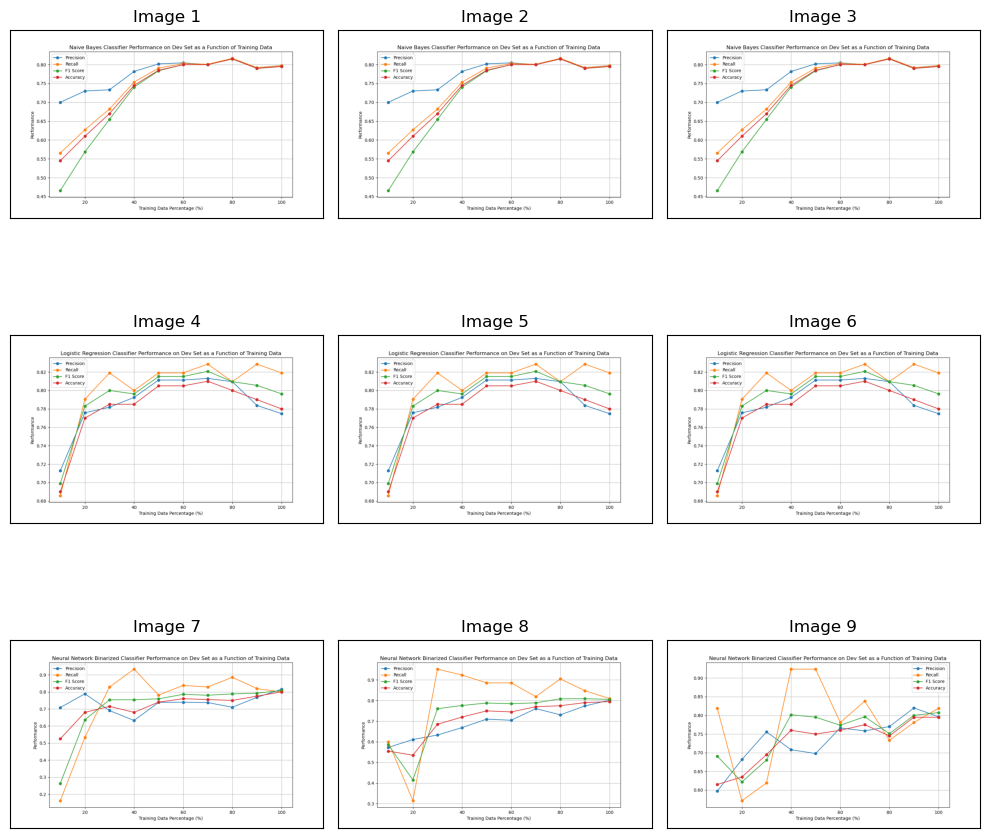

In [8]:
## YOUR CODE

## Please insert filepaths to the 9 plot images you created with your code below
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

placeholder_paths = [
    "naive_bayes_graph1.png", "naive_bayes_graph2.png", "naive_bayes_graph3.png", ## paths for the three Naive Bayes model graphs
    "logistic_regression_graph1.png", "logistic_regression_graph2.png", "logistic_regression_graph3.png", ## paths for the three Logistic Regression model graphs
    "nn_training_graph_binary1.png", "nn_training_graph_binary2.png", "nn_training_graph_binary3.png" ## paths for the three Neural Network model graphs
]

for i, ax in enumerate(axs.flat):
    try:
        img = mpimg.imread(placeholder_paths[i])
        ax.imshow(img)
    except FileNotFoundError:
        ax.text(0.5, 0.5, f"Missing Image\n{placeholder_paths[i]}", 
                ha='center', va='center', fontsize=12, color='red')
        ax.set_facecolor('lightgray')
    ax.set_title(f"Image {i+1}")

    ax.set_xticks([]) 
    ax.set_yticks([]) 

plt.tight_layout()
plt.show()




1. (1 pt) When using __10%__ of your data, which model had the highest f1 score? __On average the neural network has the highest f1 score.__
2. (1 pt) Which classifier had the most __consistent__ performance (that is, which classifier had the least variation across all three graphs you have for it -- no need to mathematically calculate this, you can just look at the graphs)? __NB and LR__
3. (1 pt) For each model, what percentage of training data resulted in the highest f1 score?
    1. Naive Bayes:__80__
    2. Logistic Regression: __70__
    3. Neural Net: __30-40__
4. (2 pts) Which model, if any, appeared to overfit the training data the most? Why? __Neural Net model appeared to overfit the data the most due to its complex algorithms.__
